![exploration.png](attachment:exploration.png)

<a id='section_id0'></a>
# BMIS2542-Data Programming Essentials *with Python*
##### Katz Graduate School of Business
## Session 4: Exploring Data

<font color="#740202">**Table of contents:**

|No.|Topic||No.|Topic||No.|Topic|
|:------|:------||:------|:------||:------|:------|
|1.|[Plotting Libraries](#section_id1)||2.|[Load and Check Data](#section_id2)||3.|[Data Distribution](#section_id3)  |
|4.|[Relating Variables](#section_id4)  ||5.|[Categories](#section_id5)  ||6.|[Trending/Smoothing Functions](#section_id6)  |
|7.|[Multi-plot Grids](#section_id7)  ||8.|[Choropleth Maps](#section_id8)||9.|[References](#section_id9)|

***

<font color="#740202">**List of Session-5 Exercises:**</font>

(1) [Importing and checking data](#section_id-ex1), (2) [Anscombe's quartet](#section_id-ex2), (3) [Choropleth map](#section_id-ex3)
***

<a id='section_id1'></a>
### <span style="background-color:#B0E0E6">Plotting libraries</span>
* We'll use the [Matplotlib](https://matplotlib.org/), [Seaborn library](https://seaborn.pydata.org/tutorial.html), and [Folium (for maps)](https://python-visualization.github.io/folium/). These are easy entry points and are very popular packages.
* Check out these cheat sheets:
    * [Data visualization with Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
    * [Plotting with Matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
    * [Interactive maps with Folium](https://andrewchallis.co.uk/img/Folium.pdf)

In [82]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Read the [Seaborn documentation about color codes](https://seaborn.pydata.org/generated/seaborn.set_color_codes.html)
* [Check out how to control figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [130]:
sns.set(color_codes=True)

In [131]:
sns.set(style="darkgrid")
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")

<a id='section_id2'></a>
### <span style="background-color:#B0E0E6">Data check</span>

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
tips = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/All Dataset for Python/tipsdata.csv')

In [135]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [136]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


#### Check for missing values

In [89]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Check summary statistics

In [90]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [137]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id3'></a>
### <span style="background-color:#B0E0E6">Visualizing the distribution of a dataset</span>

In [138]:
sns.set(color_codes=True)
sns.set(style="darkgrid")
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")

Plotting directly with Pandas and Matplotlib

<Axes: ylabel='Frequency'>

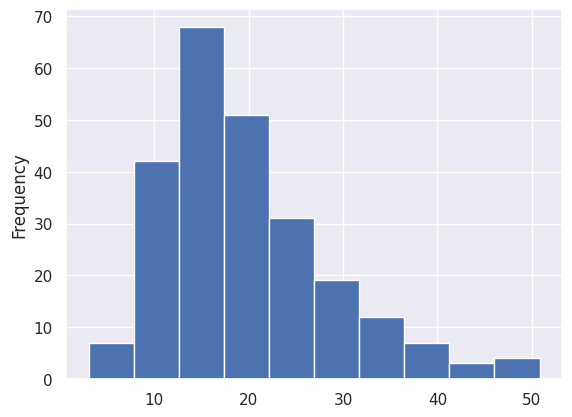

In [144]:
tips['total_bill'].plot.hist(bins=10)

Now, with Seaborn

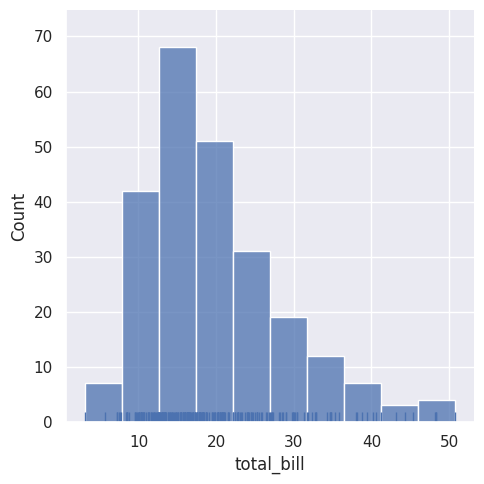

In [94]:
sns.displot(tips['total_bill'], kind='hist', bins=10,  rug=True) # kde=True: kernel density estimate

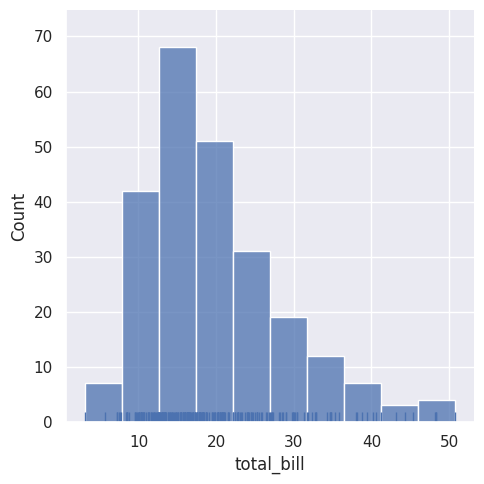

In [95]:
sns.displot(tips['total_bill'], kind='hist', bins=10, kde=False, rug=True) # distribution plots

#### Figure Size
There are a few ways to alter figure sizes:
* For some figures, you can use the "figdims" parameter of matplotlib as shown in the example below
* For other figures, you'll have to set specific parameters such as aspect ratio, height, and width -- there are examples further below in the notebook on this setting.

<Axes: ylabel='Frequency'>

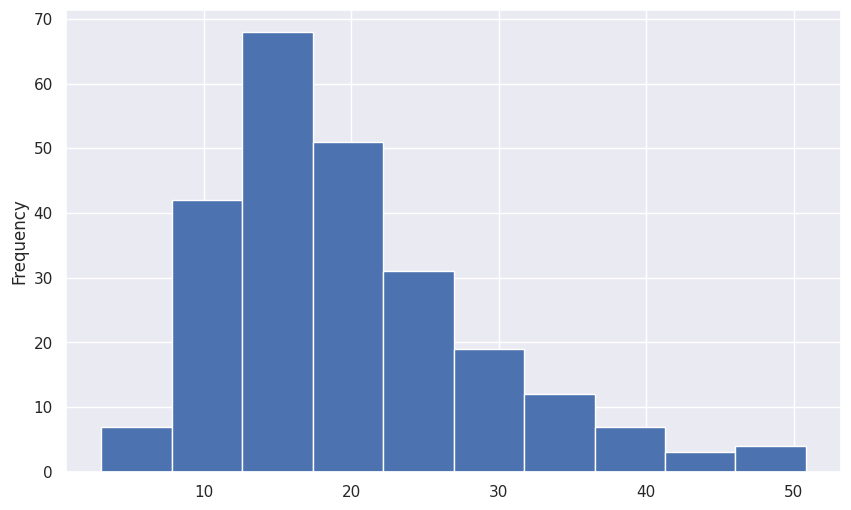

In [148]:
#bigger figure
figdims=(10, 6) #size in inches
fig, ax = plt.subplots(figsize=figdims)
tips['total_bill'].plot.hist(bins=10)

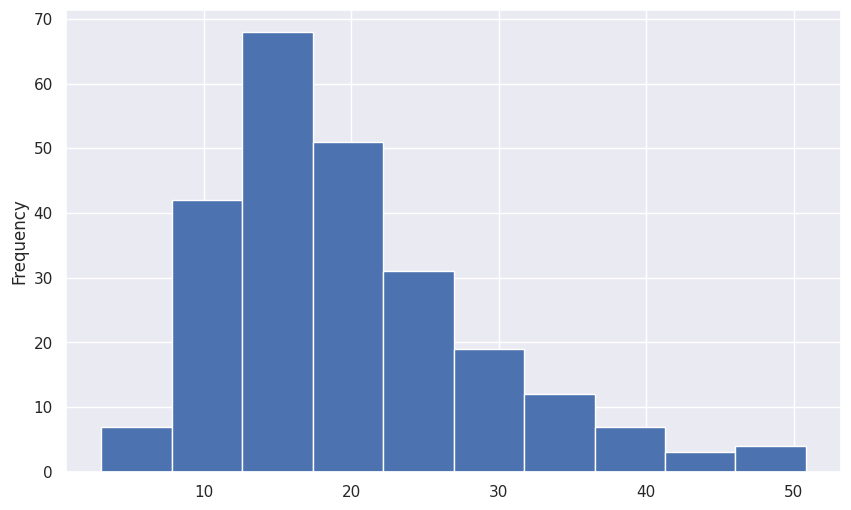

In [97]:
fig

#### Saving Figure
There are a few ways to save figures generated from matplotlib or seaborn libraries.
* In Jupyter, you can save figures by right clicking and then saving them as you would do in a webpage/browser.
* You can use the inbuilt attirbute "savefig" from matplotlib.

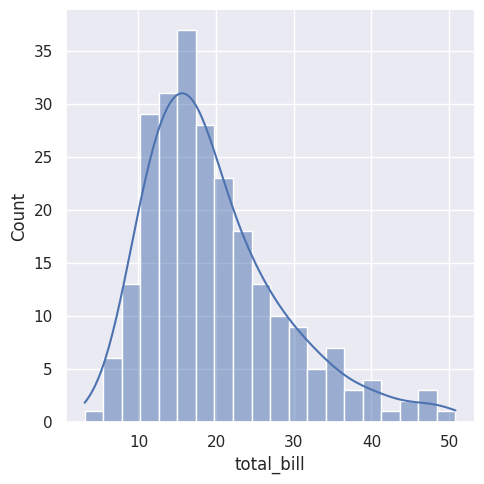

In [151]:
sns.displot(tips['total_bill'], kind='hist', bins=20, kde=True, rug=False)
plt.savefig("figure1.png") #the figure is stored in your working directory

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id4'></a>
### <span style="background-color:#B0E0E6">Relating variables</span>

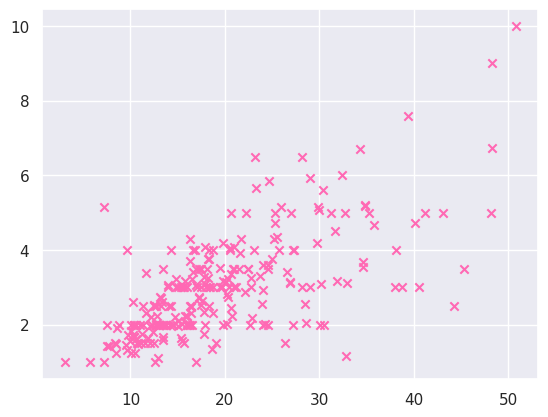

In [99]:
plt.scatter(x='total_bill', y='tip', data=tips, color = 'hotpink', marker='x')

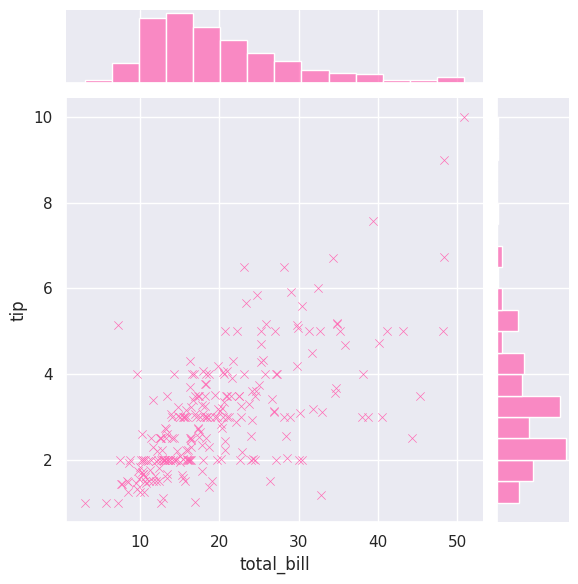

In [100]:
sns.jointplot(x='total_bill', y='tip', data=tips, color = 'hotpink', marker='x')

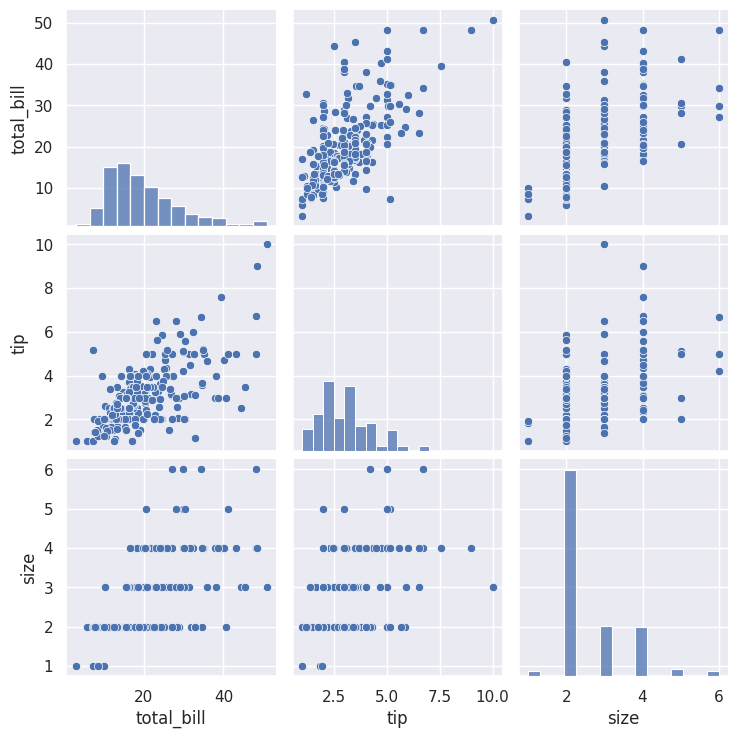

In [101]:
sns.pairplot(tips)

In [152]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(tips, *['total_bill'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(tips, *['tip'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(tips, *['size'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(tips, *['total_bill'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(tips, *['tip'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(tips, *['size'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(tips, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(tips, *['smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(tips, *['day'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(tips, *['time'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(tips, *[[['total_bill', 'tip'], ['tip', 'size']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(tips, *['sex', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(tips, *['smoker', 'day'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(tips, *['day', 'time'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(tips, *['total_bill', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(tips, *['total_bill', 'smoker'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(tips, *['total_bill', 'day'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(tips, *['total_bill', 'time'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(tips, *['time', 'total_bill', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(tips, *['time', 'total_bill', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(tips, *['time', 'total_bill', 'day'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(tips, *['time', 'total_bill', 'time'], **{})
chart

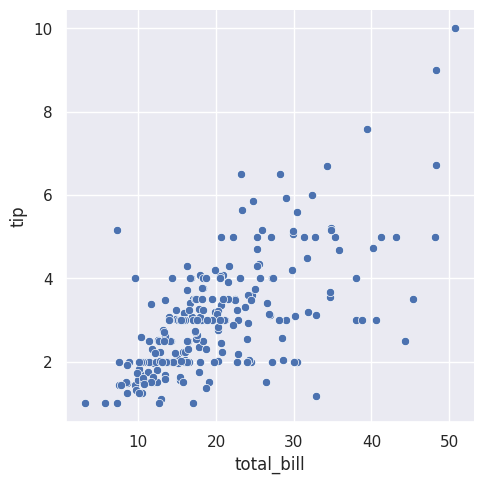

In [102]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter") # relational plots

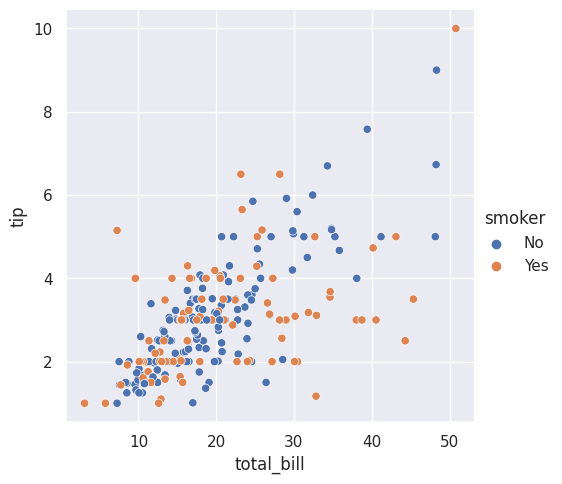

In [153]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

**Note:** The above plot is a three dimensional plot in 2D. The color is the thir dimension.

In [104]:
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

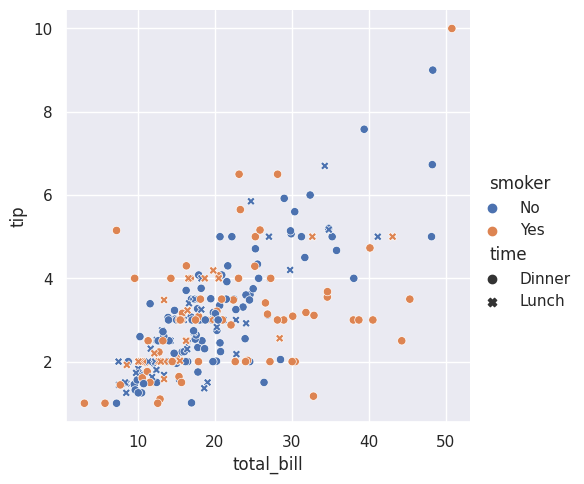

In [154]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

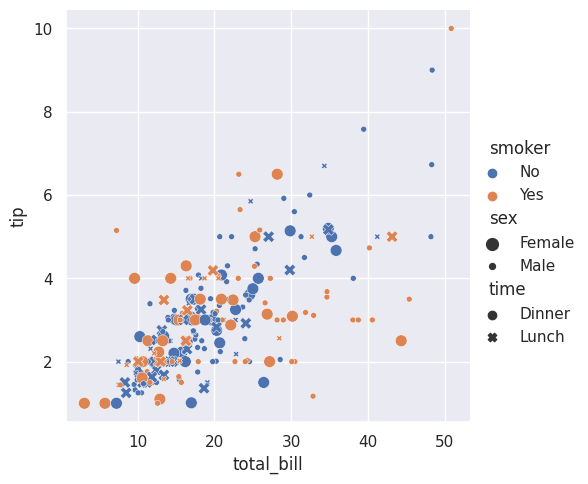

In [155]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", size= "sex", data=tips)

Note: The above is 5-dimensional plot in 2D.

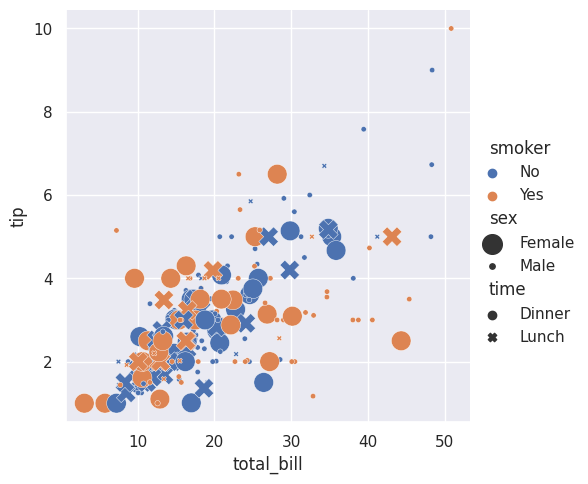

In [156]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", size= "sex", sizes=(15, 200), data=tips)

Check out the additional information about [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette)

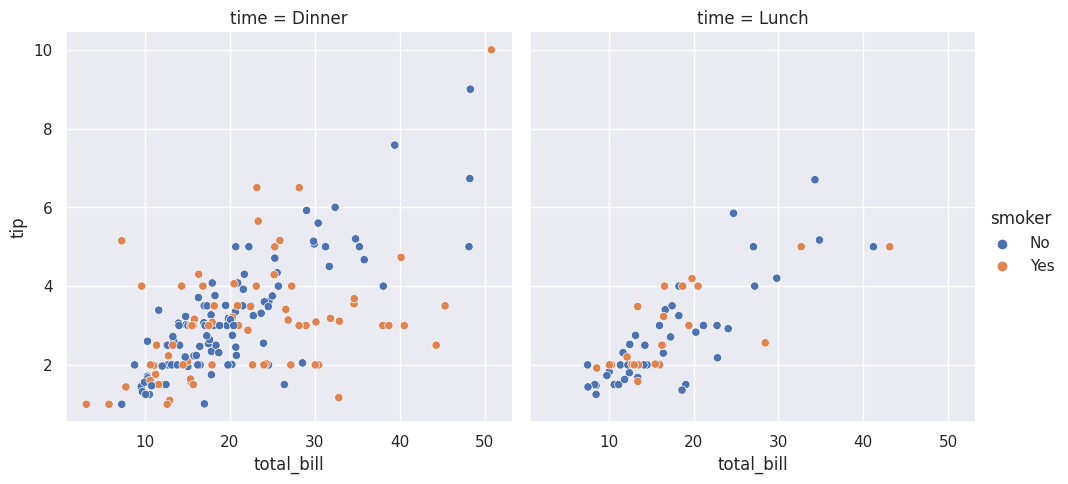

In [108]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col="time", data=tips)

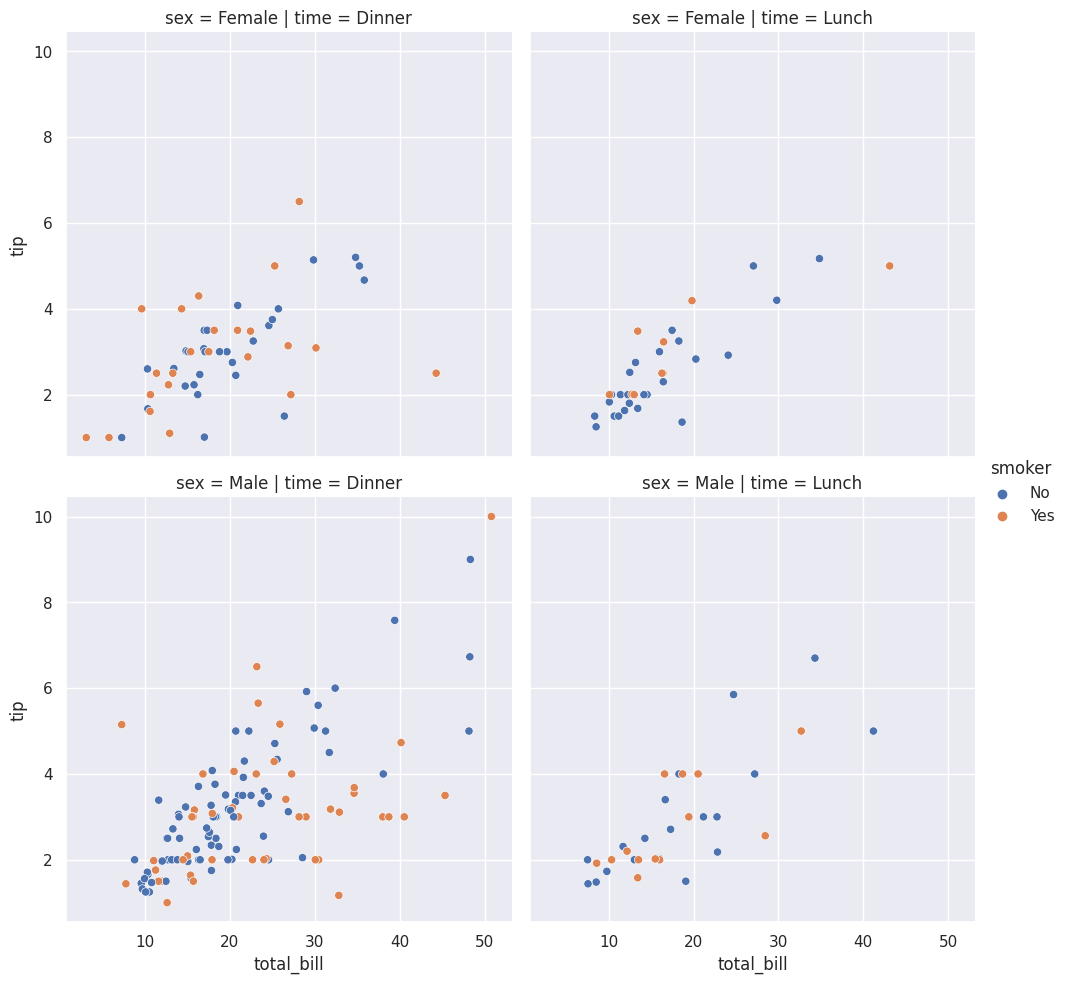

In [109]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col="time",row = "sex", data=tips)

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id5'></a>
### <span style="background-color:#B0E0E6">Categories</span>

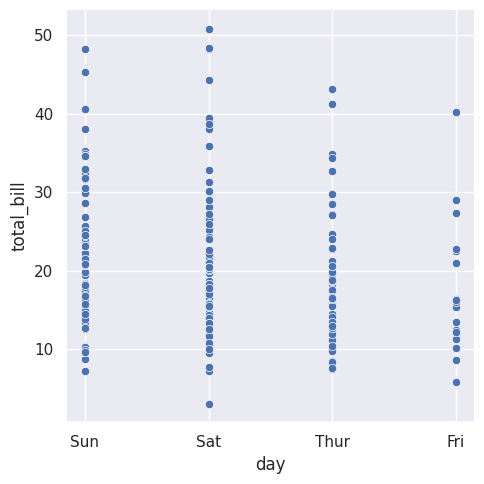

In [157]:
sns.relplot(x="day", y="total_bill", data=tips)

Note: In the abvoe plot, we see that several points are overlapping. To see acutal number of points, we add jitter (see the plot below).

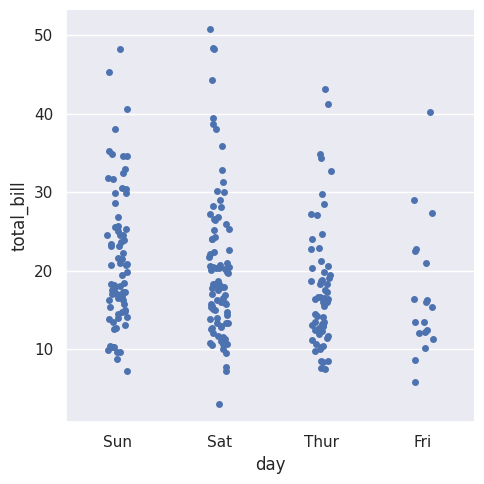

In [111]:
sns.catplot(x="day", y="total_bill", data=tips, jitter=True)

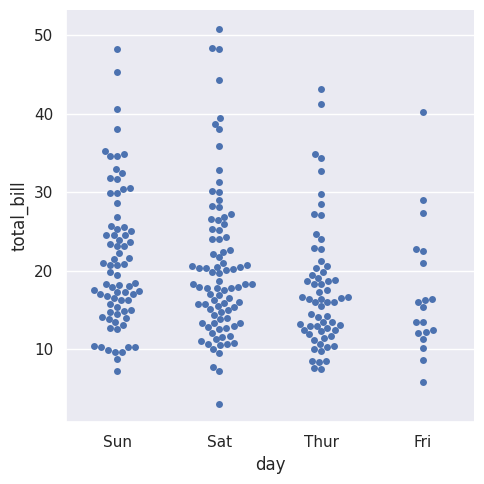

In [112]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

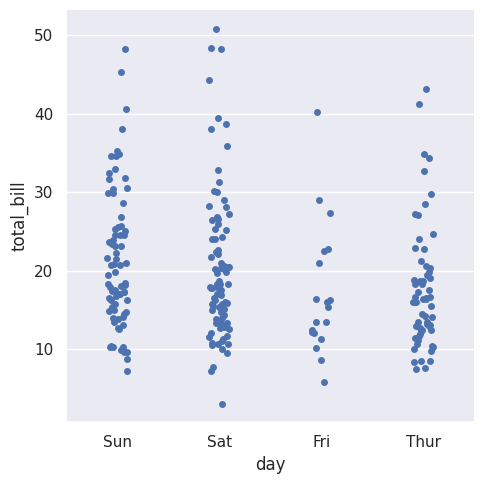

In [113]:
sns.catplot(x="day", y="total_bill", order=["Sun", "Sat", "Fri", "Thur"], data=tips) # Correcting the order of days

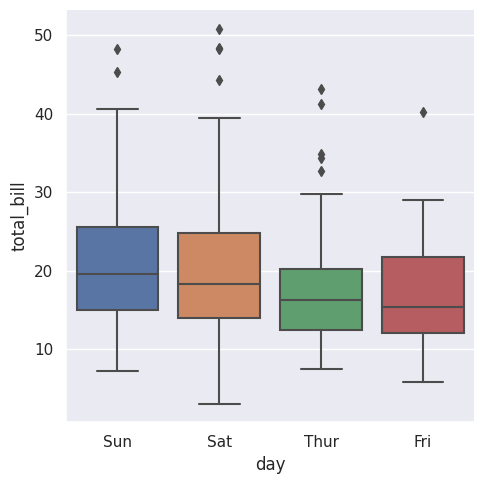

In [114]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

<ipython-input-158-fb627e100348>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="day", y="total_bill", kind="bar", data=tips, ci=None) # ci=None : Confidence Interval (ci)


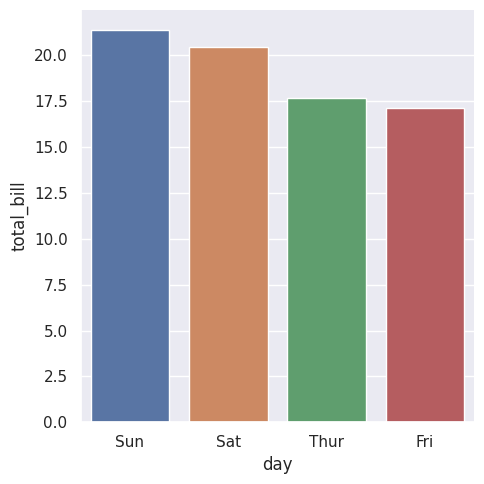

In [158]:
sns.catplot(x="day", y="total_bill", kind="bar", data=tips, ci=None) # ci=None : Confidence Interval (ci)

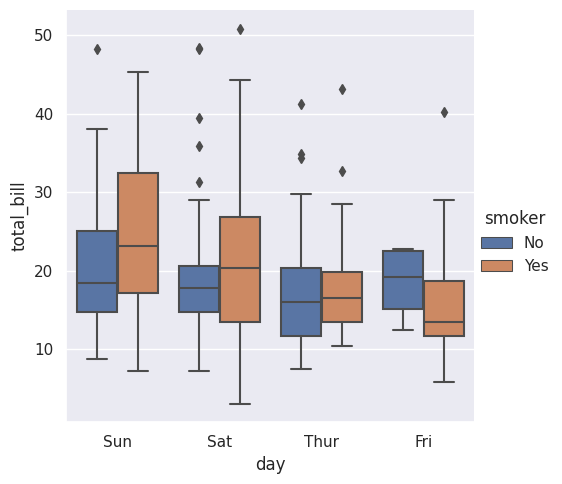

In [159]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=True)

<Axes: xlabel='count', ylabel='sex'>

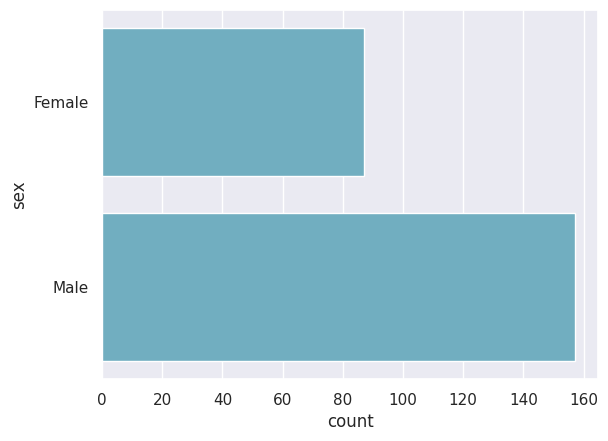

In [160]:
sns.countplot(y="sex", data=tips, color="c")

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id6'></a>
### <span style="background-color:#B0E0E6">Trending/Smoothing Functions</span>

<Axes: xlabel='total_bill', ylabel='tip'>

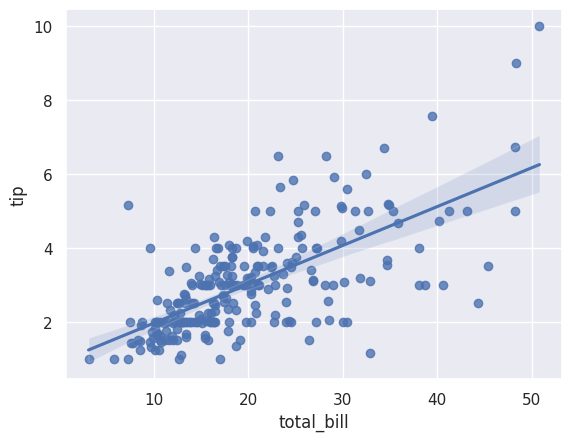

In [161]:
sns.regplot(x="total_bill", y="tip", data=tips)

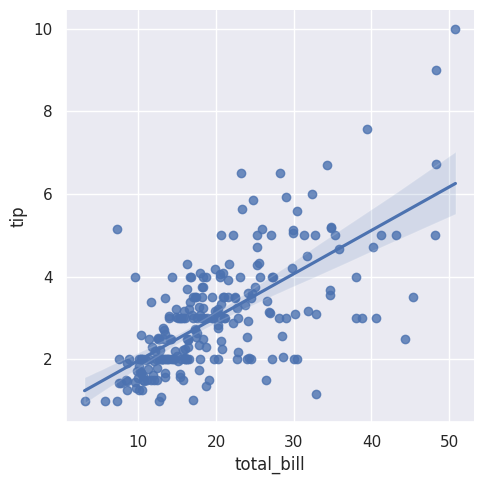

In [162]:
sns.lmplot(x="total_bill", y="tip", data=tips)

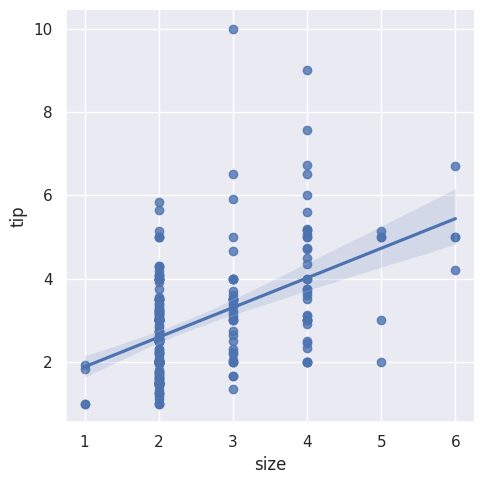

In [120]:
sns.lmplot(x="size", y="tip", data=tips)

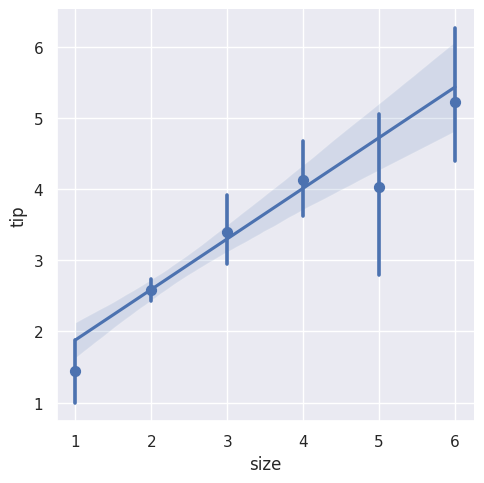

In [121]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

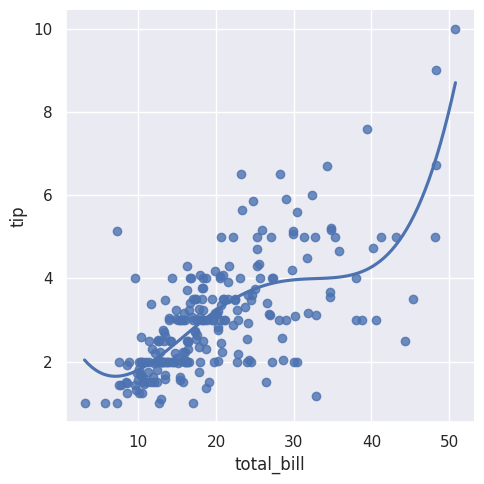

In [122]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=4, ci=None) # order=4: Forth order polynomial smoothing.

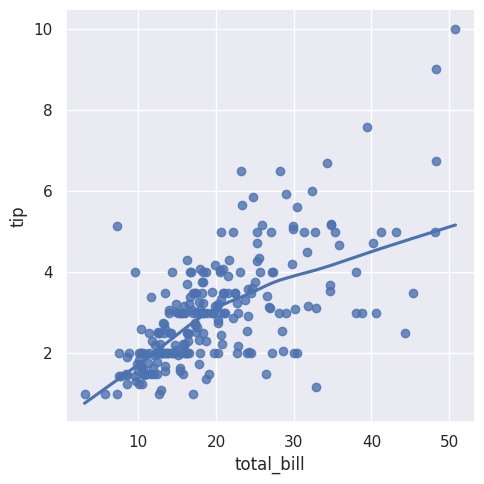

In [163]:
sns.lmplot(x="total_bill", y="tip", data=tips,lowess=True) # lowess (Locally Weighted Scatterplot Smoothing): Use lowess smoothing (https://en.wikipedia.org/wiki/Local_regression)

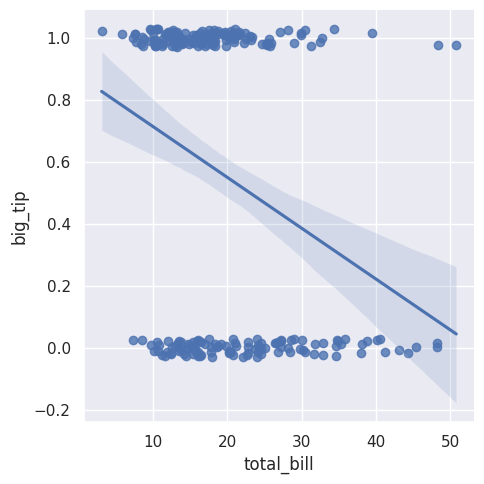

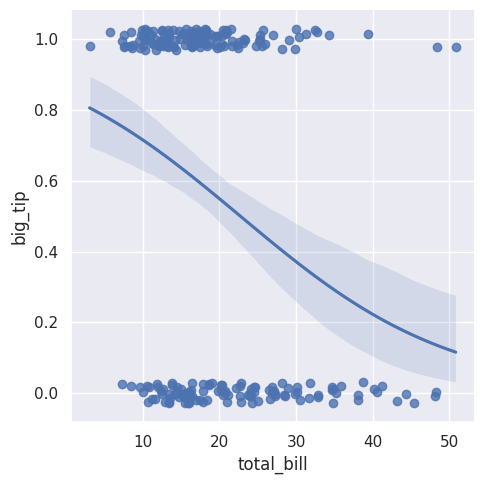

In [164]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03)
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03)

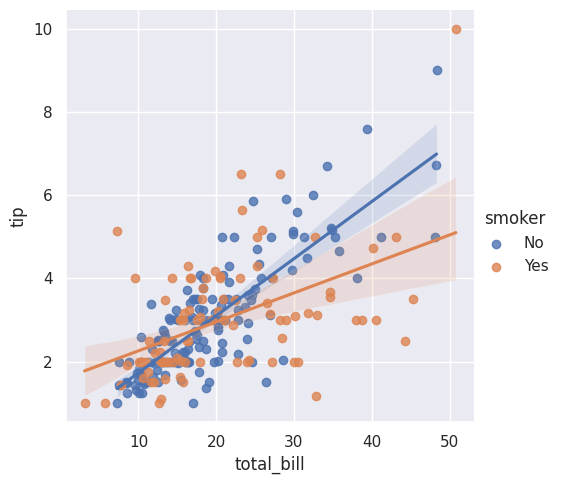

In [125]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

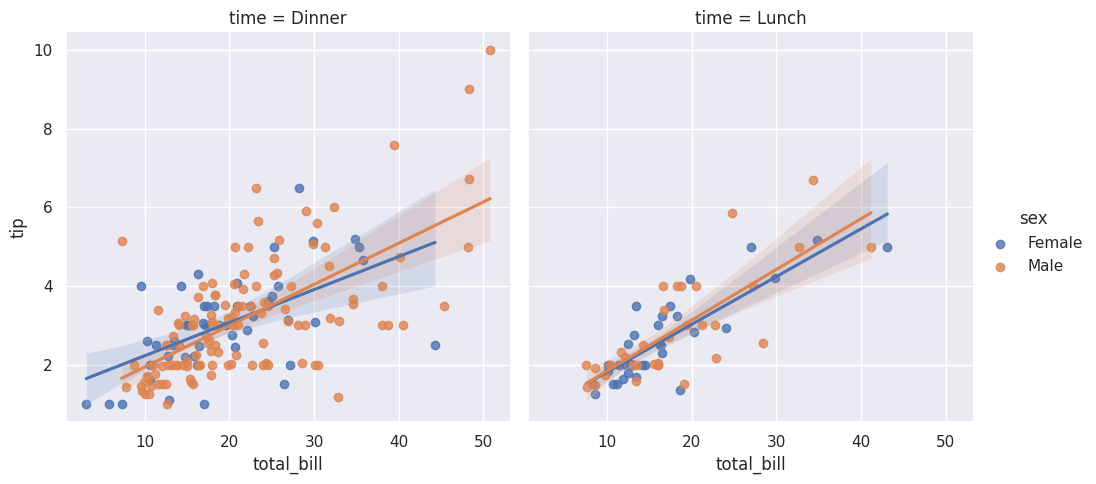

In [166]:
sns.lmplot(x="total_bill", y="tip", hue="sex", col="time", data=tips)

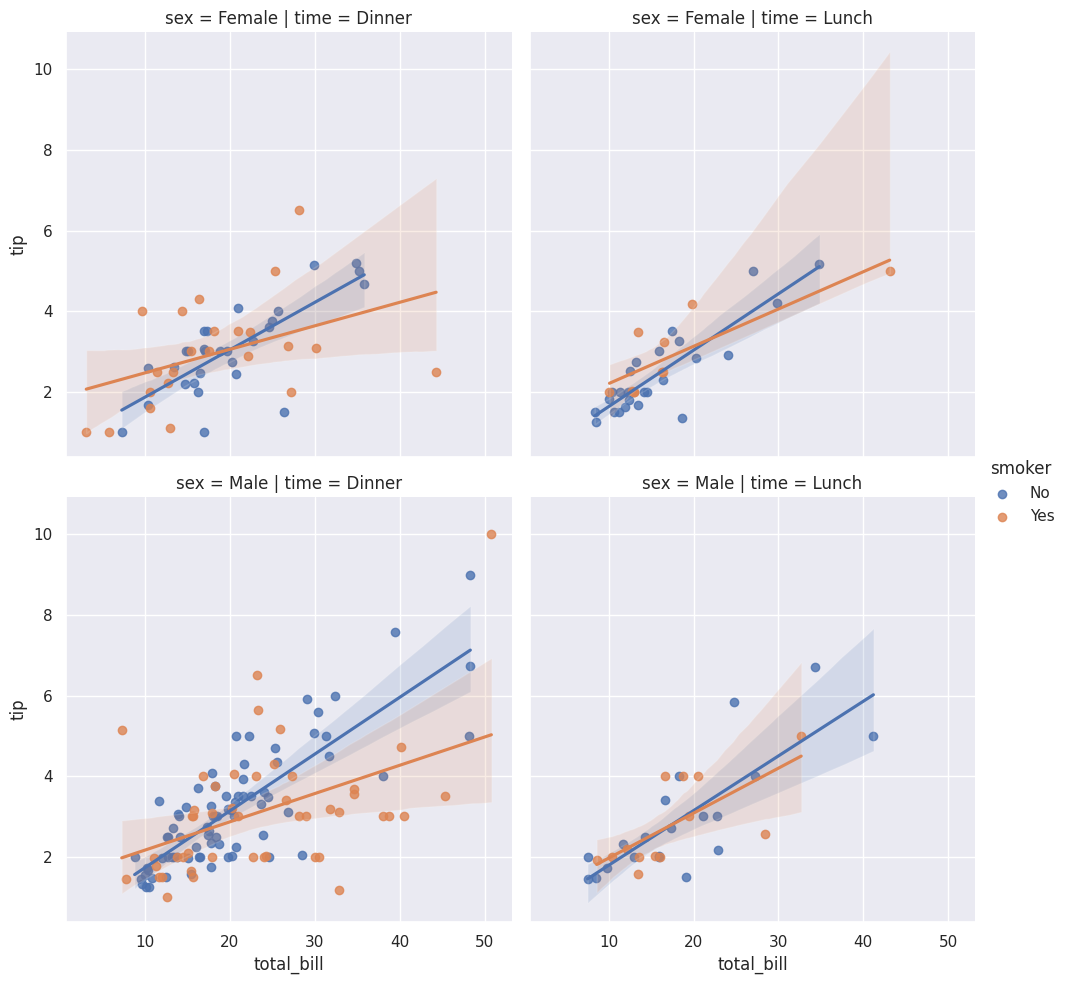

In [165]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)

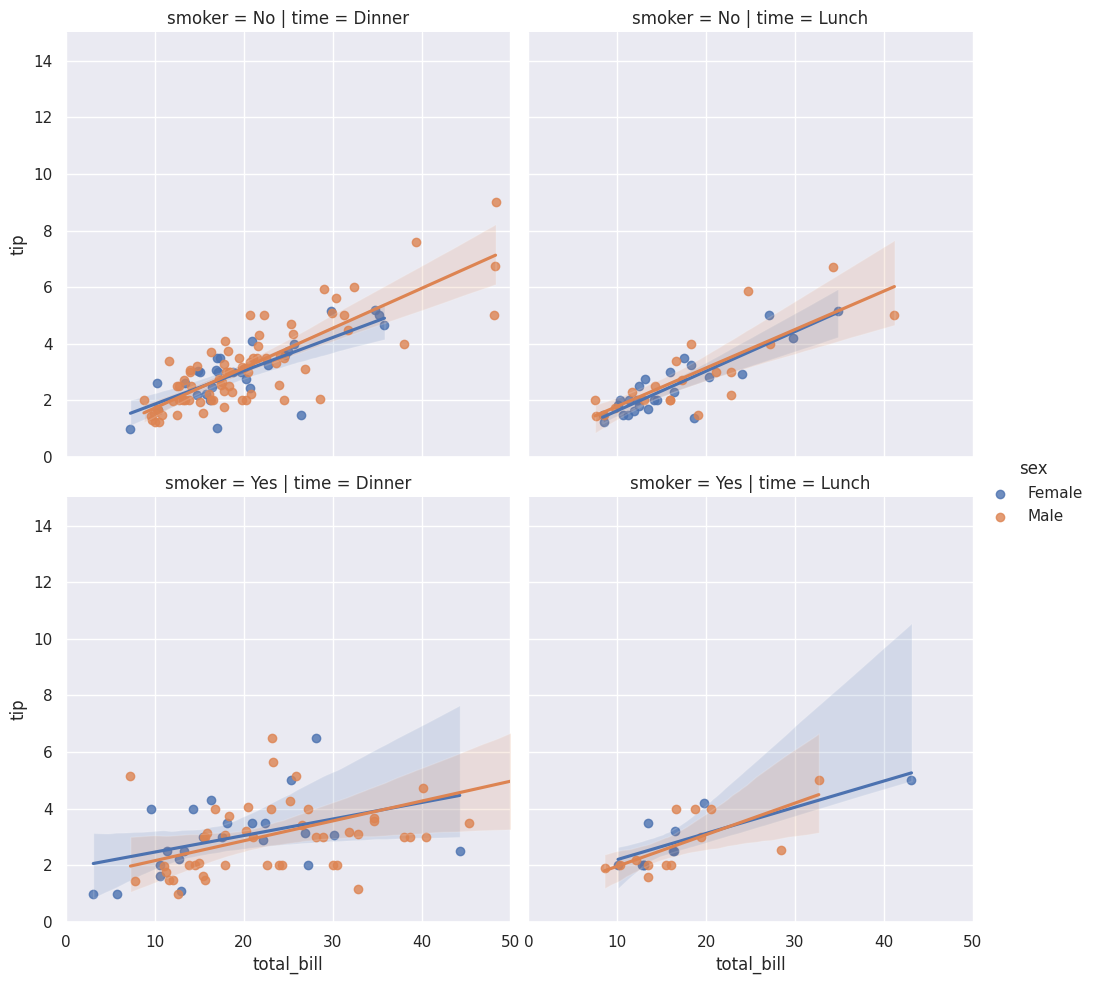

In [167]:
g=sns.lmplot(x="total_bill", y="tip", hue="sex",col="time", row="smoker", data=tips)
g.set(xlim=(0, 50), ylim=(0, 15))

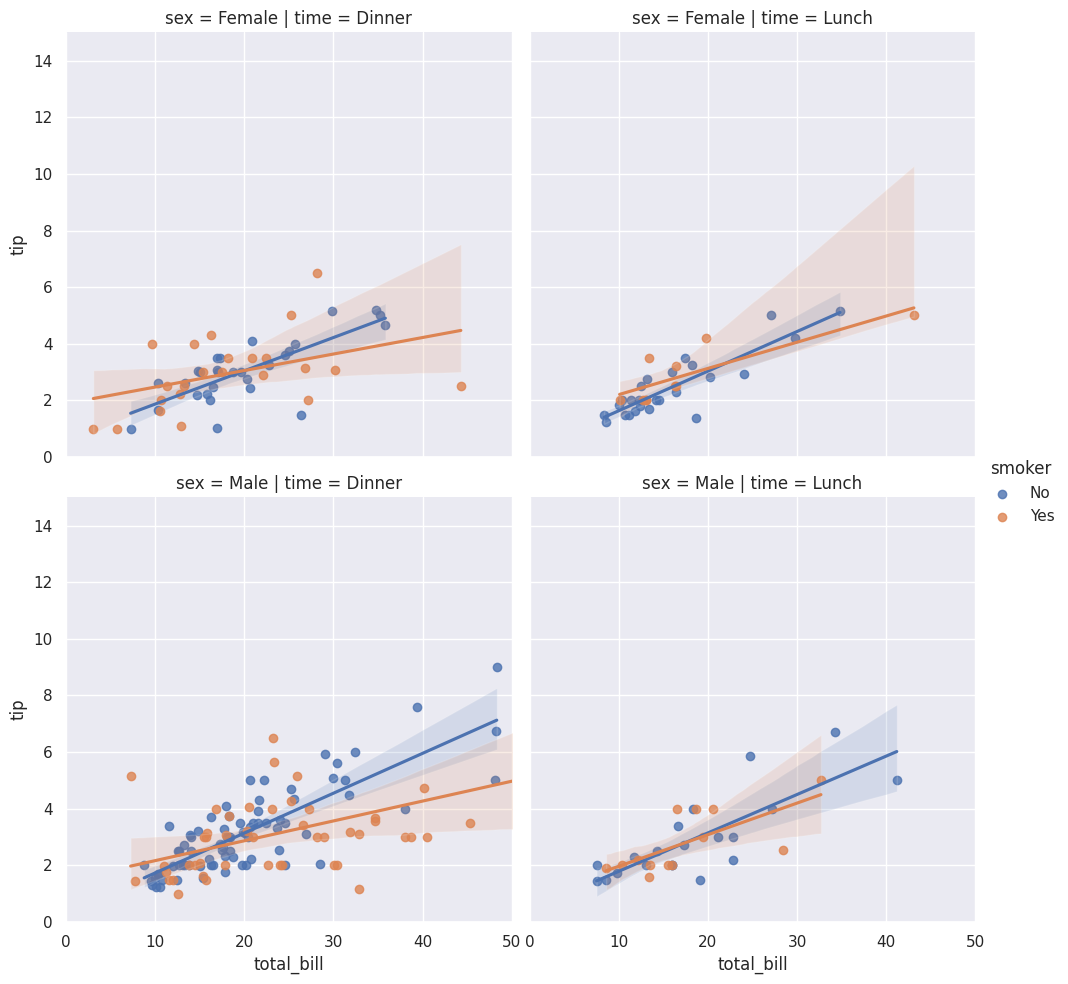

In [168]:
g=sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)
g.set(xlim=(0, 50), ylim=(0, 15))

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

### More multi-plot grids: Using FacetGrid()

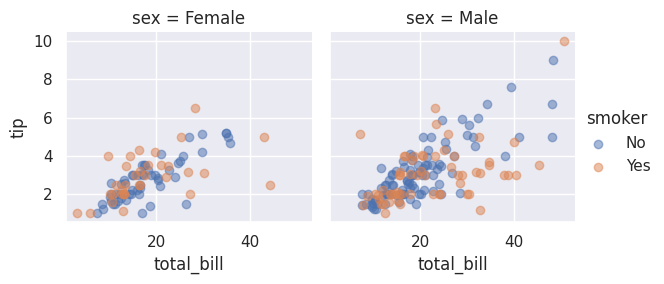

In [172]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.5) # alpha: Transparency level
g.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)


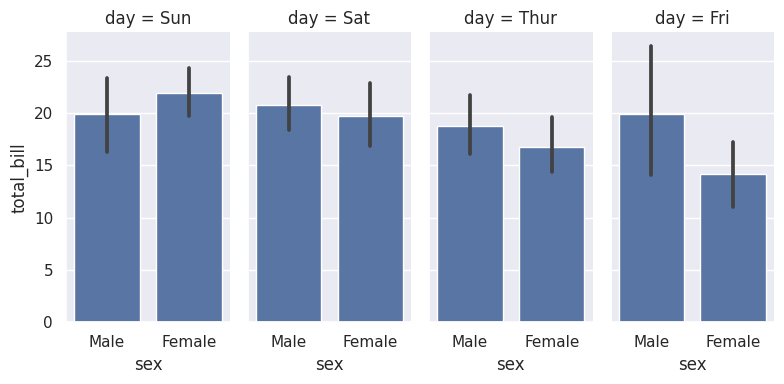

In [174]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5) # "aspect" decides the width of each bar
g.map(sns.barplot, "sex", "total_bill", ci=95, order=None)

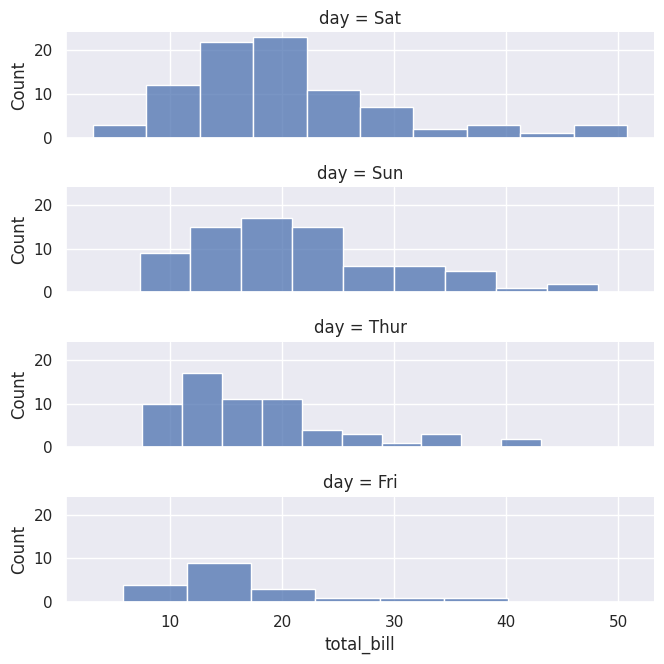

In [175]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days, height=1.7, aspect=4)
g.map(sns.histplot, "total_bill")

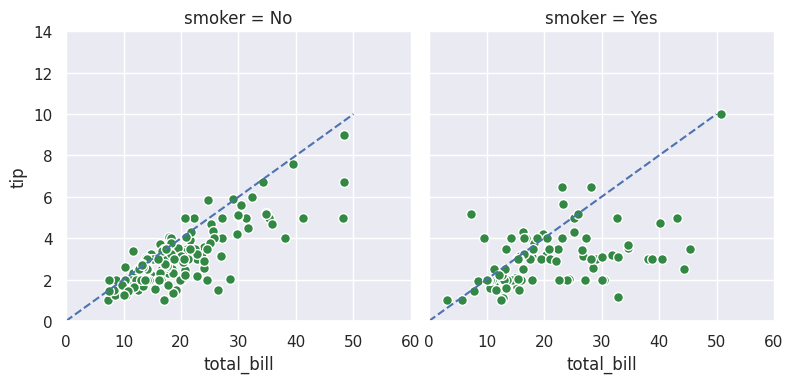

In [176]:
#lot of customizations possible:
g= sns.FacetGrid(tips, col="smoker", margin_titles=False, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))

In the above figure, the explanation for parameters are:
* s -- refers to the size of the scatter plot dots
* the hexcode for color is the html color code for the green shade
* edgecolor & lw refer to the border of the scatter dots
* For the line:
    * ls refers to the [line style](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)
    * c refers to [line color](https://matplotlib.org/3.1.1/api/colors_api.html)

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id8'></a>
### <span style="background-color:#B0E0E6">Choropleth Maps</span>
* You can install the Folium package by executing this in a code cell:<Mark> ! pip install folium </Mark>
    * [pip](https://en.wikipedia.org/wiki/Pip_(package_manager)) is a "package manager" that helps install any package found in the [Python Package Index](https://pypi.org/)
* See the [quick start examples](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps) in the Folium documentation.
* Checkout the [Folium GitHub page](https://github.com/python-visualization/folium)

In [177]:
# Uncomment (remove the #) and run to install Folium
!pip install folium

In [178]:
import folium

**Example 1: US States Map.** For this example, we'll read data from the Folium package's GitHub repository:

In [208]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # for US map with state boundaries
world_geo = f'{url}/world-countries.json' # for world map with country boundaries
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [180]:
url
state_geo
world_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

<Mark>Note:</Mark>I used the Python **f-string** feature in the above cell. An f-string is a literal string, prefixed with 'f', which contains expressions inside braces. The expressions are replaced with their values during run time. Thus, an f-string is really an expression evaluated at run time, not a constant value.

In [182]:
state_data = pd.read_csv(state_unemployment)

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [184]:
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [202]:
map1 = folium.Map(location=[48, -102], zoom_start=3)
# map1 = folium.Map(location=[40, -80], zoom_start=3)

In [212]:
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(map1)

In [213]:
folium.LayerControl().add_to(map1)

In [214]:
map1

You can breakdown the map at the county level as well. Check out the [examples in the Folium documentation](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps).

**Example 2: World countries.** We'll use a dataset from the World Bank for this example.

In [215]:
# Read in the country-level data posted on Canvas
world_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/Large Data Sets/worlddata.csv')

In [190]:
world_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


We'll use the "life expectancy at birth, female (years)" data of 2013 for our exploration

In [218]:
wdiselect = world_data[(world_data['IndicatorName']=="Life expectancy at birth, female (years)") \
                       & (world_data['Year']==2013)]
wdiselect.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377669,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,72.536117
5378129,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,74.757382
5378636,Central Europe and the Baltics,CEB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,79.973818
5379151,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,76.524546
5379759,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,75.466062


In [219]:
data_to_plot = wdiselect[['CountryCode','Value']]
data_to_plot.head()

,CountryCode,Value
5377669,ARB,72.536117
5378129,CSS,74.757382
5378636,CEB,79.973818
5379151,EAS,76.524546
5379759,EAP,75.466062


In [220]:
map2 = folium.Map(location=[40, 0], zoom_start=0.5) # [40, 0]: Lattitue, Longitue coordinates of map-center.

In [221]:
world_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

In [222]:
# choropleth maps bind Pandas Data Frames and json geometries.
folium.Choropleth(geo_data=world_geo,
                  data=data_to_plot,
             name='choropleth',
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Life expectancy at birth for females in years').add_to(map2)
folium.LayerControl().add_to(map2)

In [223]:
map2

Saving the map into present working directory as a html file:

In [224]:
map2.save('female_life.html') #saving the file to your computer

<a id='section_id9'></a>
### <span style="background-color:#B0E0E6">References</span>

* The [examples](https://matplotlib.org/stable/gallery/index.html) and [tutorials](https://matplotlib.org/stable/tutorials/index.html) of matplotlib package.
* The [example gallery](https://seaborn.pydata.org/examples/index.html) and [the tutorial materials](https://seaborn.pydata.org/tutorial.html) offerred by the seaborn package.
* Community examples:
    * [plotting crime in San Francisco](https://codeburst.io/how-i-understood-displaying-interactive-maps-using-python-leaflet-js-and-folium-bd9b98c26e0e)
    * Three part series on visualizing bikeshare data in New York city: (1) creating an [interactive plot](https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9), [customizing it with glow effects](https://blog.prototypr.io/interactive-maps-in-python-part-2-4943c4cb0ee4), and [animating the map](https://blog.prototypr.io/interactive-maps-in-python-part-3-29f14a9b2f7d).

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>